### Library imports (execute just once)

In [7]:
from pathlib import Path
import os
import pandas as pd 
from utils_data_analysis import plot_plate_view

### Define the path containing your results

In [2]:
# Type down your experiment_id (folder containing your results)
experiment_id = "Ex7_neg_LNPs_.2025-11-27-11-47-57"
results_path = Path("results") / experiment_id / "avg_int_per_cell_data.csv"

### Define the data you want to analyze

In [9]:
# Reading the .csv file as a Dataframe
df = pd.read_csv(results_path)

# Calculate average features across wells (grouping FOVs)
agg = (
    df.groupby(["well_id"], as_index=False)
      .agg({
          "nuclei_intensity_mean": "mean",
          "cytoplasm_intensity_mean": "mean",
      })
)

# Define the .csv name
csv_name = "avg_int_per_well_data.csv"

# Construct save path 
csv_path = Path("results") / experiment_id / csv_name

# Save file
agg.to_csv((csv_path), index=False, header=not os.path.isfile(csv_path))

### Plot the results

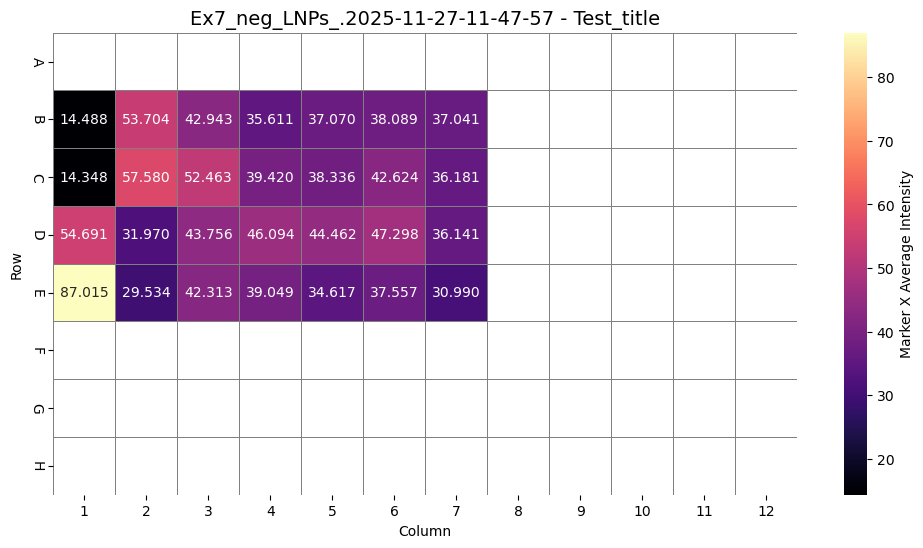

Saved plate view to ./results/Ex7_neg_LNPs_.2025-11-27-11-47-57/plate_view\Ex7_neg_LNPs_.2025-11-27-11-47-57_nuclei_intensity_mean.png


In [12]:
# Jot down the feature that you want to plot, the title you wish to have and the label for the scale
column_name = "nuclei_intensity_mean"
title = "Test_title"
label = "Marker X Average Intensity"

plot_plate_view(agg, column_name, experiment_id, title, label, fmt=3, display=True, cmap="magma")